**Application on the Fashion MNIST data. The Fashion MNIST consists of 70,000 grayscale images divided into a training set of 60,000 images and a test set of 10,000 images.**

Load necessary packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Define the activation function and loss function

In [2]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def d_sigmoid(z):
    return sigmoid(z) * (1.0 - sigmoid(z))

def mse(a, y):
    return .5*sum((a[i] - y[i])**2 for i in range(len(y)))[0]

Initialize the weight metrices

In [3]:
def initialize_weights(layers = [784, 60, 60, 10]):
    W = [[0.0]]
    B = [[0.0]]
    for i in range(1, len(layers)):
        w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])
        b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])

        W.append(w_temp)
        B.append(b_temp)
    return W, B

Forward propagation

In [4]:
def forward_pass(W, B, xi, predict_vector = False):
    Z = [[0.0]]
    A = [xi]
    L = len(W) - 1
    for i in range(1, L+1):
        z = W[i] @ A[i-1] + B[i]
        Z.append(z)

        a = sigmoid(z)
        A.append(a)
    
    if predict_vector == False:
        return Z, A
    else:
        return A[-1]

Cost function

In [5]:
def MSE(W, B, X, y):
    cost = 0.0
    m = 0
    for xi, yi in zip(X,y):
        a = forward_pass(W, B, xi, predict_vector= True)
        cost += mse(a, yi)
        m+=1
    return cost/m

Build the dense network class

In [6]:
class DenseNetwork(object):
    def __init__(self, layers = [784, 60, 60, 10]):
        self.layers = layers
        self.W, self.B = initialize_weights(layers = self.layers)

    def train(self, X_train, y_train, alpha = 0.01, epochs = 50):
        self.errors_ = [MSE(self.W, self.B, X_train, y_train)]
        print(f"Starting Cost = {self.errors_[0]}")

        sample_size = len(X_train)

        L = len(self.layers) - 1

        for k in range(epochs):
            for xi, yi in zip(X_train, y_train):
                Z, A = forward_pass(self.W, self.B, xi)

                deltas = dict()

                output_error = (A[L] - yi)*d_sigmoid(Z[L])
                deltas[L] = output_error

                for i in range(L-1, 0, -1):
                    deltas[i] = (self.W[i+1].T @ deltas[i+1])*d_sigmoid(Z[i])

                for i in range(1, L+1):
                    self.W[i] -= alpha*deltas[i] @ A[i-1].T
                    self.B[i] -= alpha*deltas[i]

            self.errors_.append(MSE(self.W, self.B, X_train, y_train))   
            print(f"{k + 1}-Epoch Cost = {self.errors_[-1]}")
    

    def predict(self, xi):
        depth = len(self.layers)
        _, A = forward_pass(self.W, self.B, xi)
        return np.argmax(A[-1])

In [7]:
net = DenseNetwork(layers=[784,128,10])

Load the Fashion MNIST data and use the first 600 training data and 100 testing data (because of the computation power of the device).

In [8]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

train_X = train_X[:600]
train_y = train_y[:600]
test_X = test_X[:100]
test_y = test_y[:100]

2024-04-26 12:01:22.984497: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Visualize an image from the dataset. It seems to be a bag.

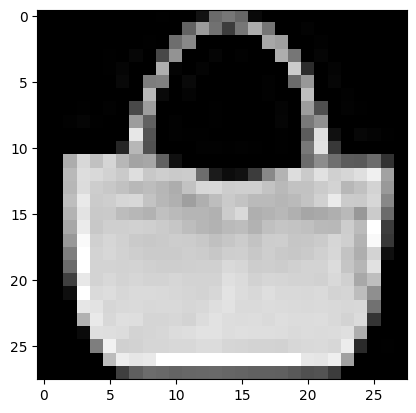

In [9]:
plt.imshow(train_X[100], cmap="gray")
plt.show()

One-Hot Encoding

In [10]:
train_X = train_X/255
test_X = test_X/255

flat_train_X = []
onehot_train_y = []

for x, y in zip(train_X, train_y):
    flat_train_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10,1))
    temp_vec[y][0] = 1.0
    onehot_train_y.append(temp_vec)

flat_test_X = []
onehot_test_y = []

for x, y in zip(test_X, test_y):
    flat_test_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y] = 1.0
    onehot_test_y.append(temp_vec)


In [11]:
net.train(flat_train_X, onehot_train_y)

Starting Cost = 1.2660005141811617
1-Epoch Cost = 0.42541393351735324
2-Epoch Cost = 0.40352868576092515
3-Epoch Cost = 0.38061673575385097
4-Epoch Cost = 0.3590424574672567
5-Epoch Cost = 0.33983756778991214
6-Epoch Cost = 0.3231058034785252
7-Epoch Cost = 0.3085408880624126
8-Epoch Cost = 0.29576982292039905
9-Epoch Cost = 0.2844647372984795
10-Epoch Cost = 0.2743620038856654
11-Epoch Cost = 0.265257839870147
12-Epoch Cost = 0.25699721023209265
13-Epoch Cost = 0.24946153712141883
14-Epoch Cost = 0.2425580091895967
15-Epoch Cost = 0.23621157597848103
16-Epoch Cost = 0.23035954212971912
17-Epoch Cost = 0.22494813970018473
18-Epoch Cost = 0.21993040354923607
19-Epoch Cost = 0.21526483651057116
20-Epoch Cost = 0.21091453707601068
21-Epoch Cost = 0.20684659730677676
22-Epoch Cost = 0.2030316576710423
23-Epoch Cost = 0.19944354932387728
24-Epoch Cost = 0.19605898231297264
25-Epoch Cost = 0.1928572585641886
26-Epoch Cost = 0.1898200022732311
27-Epoch Cost = 0.18693090761810094
28-Epoch Cost

In [12]:
print(f"Classification Accuracy = {sum([int(net.predict(x) == y) for x, y in zip(flat_test_X, test_y)])/len(onehot_test_y)}")

Classification Accuracy = 0.74


<span style="color: blue;">In conclusion, even though we only use the first 600 training data, we still get a prediction accuracy of 74%. It means that for this complex image recognition task, the neural networks perform well.</span>

Using TensorFlow package for the same task

In [13]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10)                       
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

/usr/local/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7598 - loss: 0.7440
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8529 - loss: 0.4058
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8721 - loss: 0.3543
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8816 - loss: 0.3295
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8836 - loss: 0.3139
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8906 - loss: 0.2966
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8978 - loss: 0.2819
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9016 - loss: 0.2687
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9023 - loss: 0.2639
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9084 - loss: 0.2493
313/313 - 0s - 2ms/step - accuracy: 0.8830 - loss: 0.3262

Test accuracy: 0.8830000162124634


<span style="color: blue;">The accuracy by using TensorFlow package is about 88%, which performs well in accomplishing this large image recognition task.</span>

---

### Conclusion

In summary, we can see that neural networks are good at complishing difficult and complex tasks. However, compared to the previous algorithms, neural networks require more computation resources.